In [ ]:
from google.colab import files

data = files.upload()
#fixbug
import pandas as pd
data = pd.read_csv('diabetes_after_drop_null.csv')
data

Saving diabetes_after_drop_null.csv to diabetes_after_drop_null (2).csv


,diabetes_filtered null,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
527,9,170,74,31,0,44.0,0.403,43,1
528,10,101,76,48,180,32.9,0.171,63,0
529,2,122,70,27,0,36.8,0.340,27,0
530,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)
model_logis = LogisticRegression()
model_logis.fit(X_train, y_train)
y_pred = model_logis.predict(X_test)
acc = format(accuracy_score(y_test, y_pred), "0.2%")
acc

'74.38%'

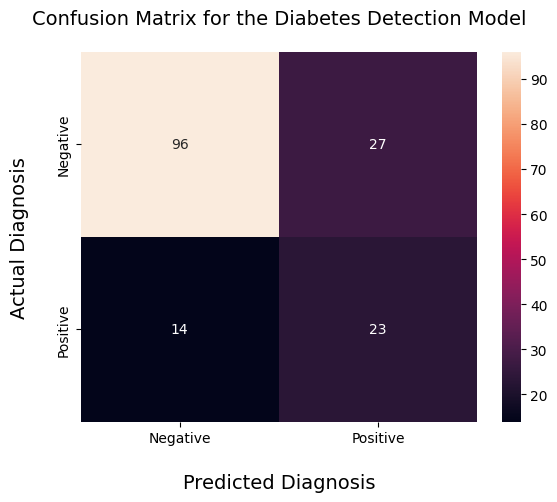

In [ ]:
conf_matrix = confusion_matrix(y_pred,y_test)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       110
           1       0.62      0.46      0.53        50

    accuracy                           0.74       160
   macro avg       0.70      0.67      0.68       160
weighted avg       0.73      0.74      0.73       160

